<Figure size 640x480 with 0 Axes>

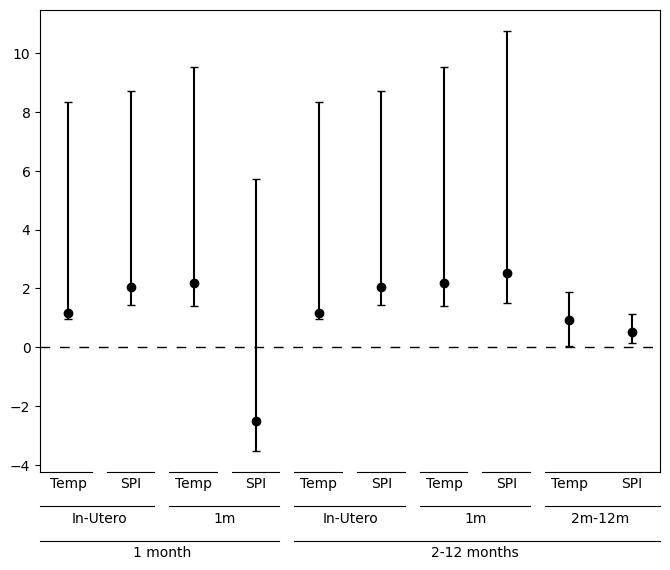

In [2]:
#TODO: add way to plot the negative regression coefficients in a different color

def plot_regression_coefficients(values, ci_top, ci_bot, outpath):
    import matplotlib.pyplot as plt
    import numpy as np
    
    def add_whitespace_to_axis(ax, x):
            ax.set_xticks(x)
            ax.set_xticklabels("")
            ax.tick_params(axis="x", length=10, width=10, color="white", direction="inout", zorder=100)  # Remove tick marks
            ax.spines["bottom"].set_visible(False)  # Move third x-axis further down
            ax.set_xticks(x, minor=True)

            return ax
    
    fig = plt.figure()
    x = range(1, len(p_10)+1)
    yerr = [list(np.array(ci_bot)),# + np.array(values)), # 'down' error
            list(np.array(ci_top))]# - np.array(values))]  # 'up' error

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot error bars
    ax.errorbar(x, values, yerr=yerr, capsize=3, fmt="o", color="black")
    ax.axhline(y=0, color="black", linestyle="--", dashes=(7, 7), linewidth =1)

    # Set first level of labels (Temp and SPI)
    ax = add_whitespace_to_axis(ax, [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])

    x_labels = ["Temp", "SPI", "Temp", "SPI", "Temp", "SPI", "Temp", "SPI", "Temp", "SPI"]
    ax2 = ax.secondary_xaxis('bottom')
    ax2.set_xticks(x)
    ax2.set_xticklabels(x_labels)
    ax2.tick_params(axis="x", length=0)  # Remove tick marks

    # Set second level of labels (1 month and 2-12 months)
    ax3 = ax.secondary_xaxis('bottom')  # Add another secondary x-axis
    ax3.spines["bottom"].set_position(("outward", 25))  # Move third x-axis further down
    ax3.set_xticks([1.5, 3.5, 5.5, 7.5, 9.5],)
    ax3.set_xticklabels(["In-Utero", "1m", "In-Utero", "1m", "2m-12m"])
    ax3.tick_params(axis="x", length=0)  # Remove tick marks

    ax4 = ax.secondary_xaxis('bottom')  # Add another secondary x-axis
    ax4.spines["bottom"].set_position(("outward", 25))  # Move third x-axis further down
    ax4 = add_whitespace_to_axis(ax4, [2.5, 4.5, 6.5, 8.5])

    # Set third level of labels (1 month and 2-12 months)
    ax3 = ax.secondary_xaxis('bottom')  # Add another secondary x-axis
    ax3.spines["bottom"].set_position(("outward", 50))  # Move third x-axis further down
    ax3.set_xticks([2.5, 7.5],)
    ax3.set_xticklabels(["1 month", "2-12 months"])
    ax3.tick_params(axis="x", length=0)  # Remove tick marks

    ax4 = ax.secondary_xaxis('bottom')  # Add another secondary x-axis
    ax4.spines["bottom"].set_position(("outward", 50))  # Move third x-axis further down
    ax4 = add_whitespace_to_axis(ax4, [4.5])


    fig.savefig(outpath, bbox_inches='tight', pad_inches=1)
    # 
    # # Create second level of labels (1 month and 2-12 months)
    # midpoints = [1.5, 3.5, 5.5, 7.5]
    # ax2.set_xticks(midpoints)
    # ax2.set_xticks([0, 2.5, 4.5, 6.5], minor=True)  # Group positions
    # ax2.set_xticklabels(["In-Utero", "1m", "In-Utero", "1m"], fontsize=12, fontweight="bold")
    # ax2.spines["bottom"].set_position(("outward", 25))  # Move third x-ax2is further down
    # ax2.tick_params(which = 'minor', axis="x", length=10, width=10, color="red", direction="inout", zorder=1000000)  # Remove tick marks

## Data
p_10 = [.19,.62, .77, 1, .19,.62, .77, 1, .88, .4]
p_90 = [7.19, 6.67, 7.36, 8.25, 7.19, 6.67, 7.36, 8.25, .97, .6]
M = [1.16, 2.06, 2.17, -2.52, 1.16, 2.06, 2.17, 2.52, .92, .53]

plot_regression_coefficients(M, p_90, p_10, r"D:\World Bank\Paper - Child Mortality and Climate Shocks\Outputs\Figures\coefplot.png")
